<div style="color:white;
           display:fill;
           border-radius:16px;
           background-color:#A75BD5;
           font-size:140%;
           font-family:Verdana">

<p style="padding: 10px;
          color:White;
          font-weight: bold;
          text-align: center;
          font-size:130%;">
Heart Attack EDA & Prediction

</p>
</div>  

<img src= "https://media.giphy.com/media/xT5LMBk9CIQXji0wNy/giphy.gif">
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid #A75BD5; background-color:#A75BD5;font-weight: bold; color:white; font-family:Verdana;">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#A75BD5;font-weight: bold; font-family:Verdana;font-size:16px;">Libraries and Utilities<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#A75BD5;font-weight: bold; font-family:Verdana;font-size:16px;">Load and Check Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#A75BD5;font-weight: bold; font-family:Verdana;font-size:16px;">Understanding Data<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#A75BD5;font-weight: bold; font-family:Verdana;font-size:16px;">Exploratory Data Analysis<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#A75BD5;font-weight: bold; font-family:Verdana;font-size:16px;">Data Preprocessing<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#A75BD5;font-weight: bold; font-family:Verdana;font-size:16px;">Model Preparation<span class="badge badge-primary badge-pill">6</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#A75BD5;font-weight: bold; font-family:Verdana;font-size:16px;">Models<span class="badge badge-primary badge-pill">7</span></a>

</div>
</div>
</div>

<a id = "1"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#A75BD5; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Libraries and Utilities</span></h1>

In [122]:
import os
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from scipy.stats import shapiro
from scipy.stats import levene
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
from collections import Counter
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id = "2"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#A75BD5; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Load and Check Data</span></h1>

In [123]:
heart = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df = heart.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a id = "3"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#A75BD5; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Understanding Data</span></h1>

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Variable Description</span>

**Age :** Age of the patient

**Sex :** Sex of the patient

**exang:** exercise induced angina (1 = yes; 0 = no)

**ca:** number of major vessels (0-3)

**cp :** Chest Pain type chest pain type

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

**chol :** cholestoral in mg/dl fetched via BMI sensor

**fbs :** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg :** resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

**target :** 0= less chance of heart attack 1= more chance of heart attack

In [124]:
def check_df(dataframe, head=5):
    
    print(" SHAPE ".center(70,'#'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'#'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'#'))
    print(dataframe.head(head))
    print(' TAIL '.center(70,'#'))
    print(dataframe.tail(head))
    print(' MISSING VALUES '.center(70,'#'))
    print(dataframe.isnull().sum())
    print(' DUPLICATED VALUES '.center(70,'#'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'#'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_df(df)

############################### SHAPE ################################
Rows: 303
Columns: 14
############################### TYPES ################################
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
################################ HEAD ################################
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  

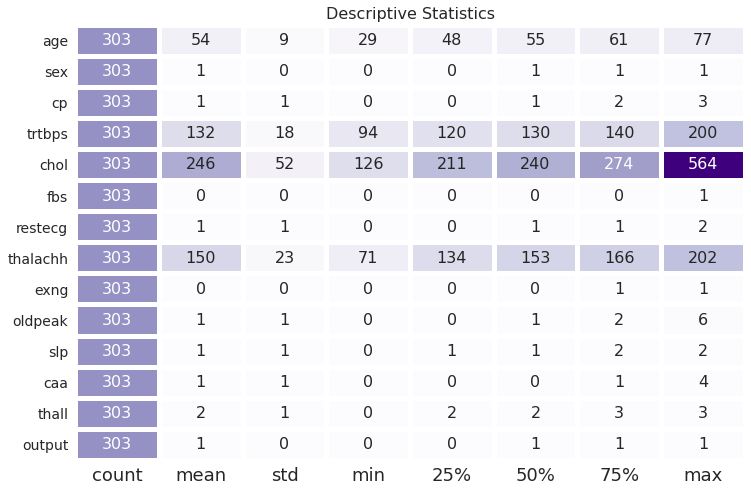

In [125]:
desc = df.describe().T
desc_df = pd.DataFrame(index= [col for col in df.columns if df[col].dtype != 'O'], 
                   columns= df.describe().T.columns.tolist(),data= desc )

f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(desc_df, annot=True,cmap = "Purples", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 18)
plt.yticks(size = 14, rotation = 0)
plt.title("Descriptive Statistics", size = 16)
plt.show()

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Missing Values</span>

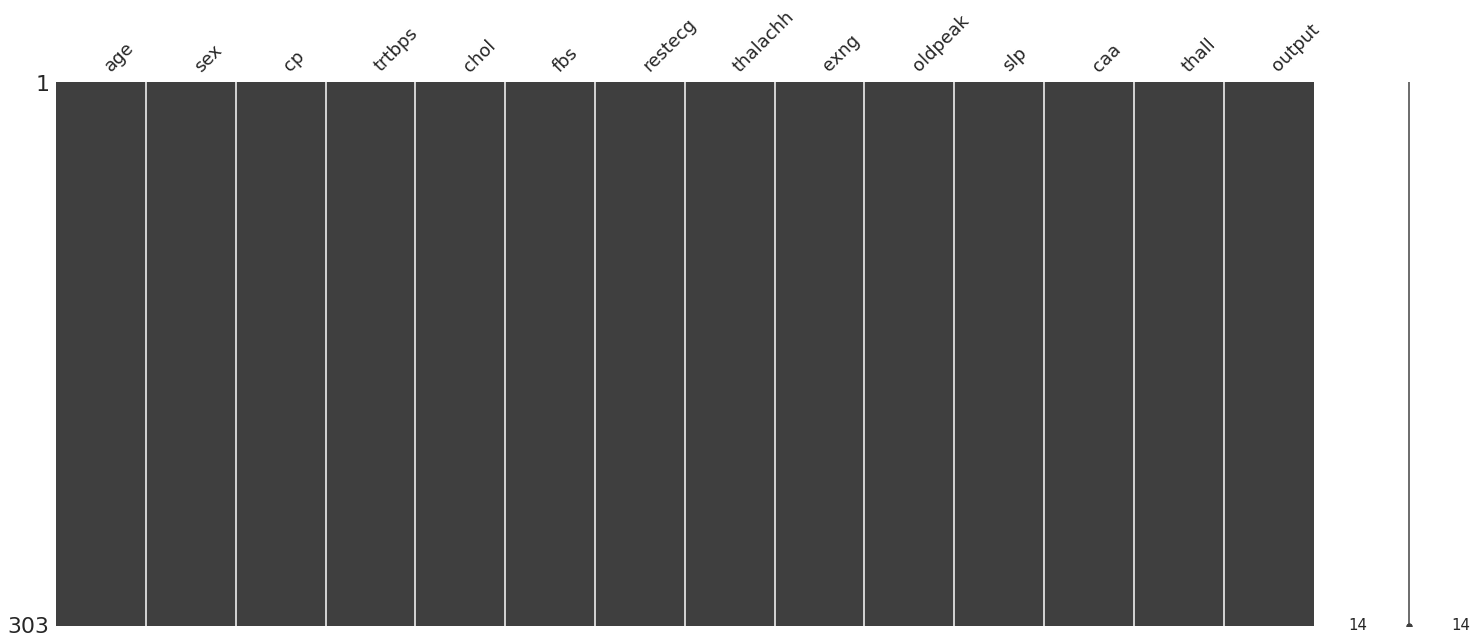

In [126]:
missingno.matrix(df, fontsize = 18)
plt.show()

In [127]:
df.profile_report()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id = "4"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#A75BD5; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Exploratory Data Analysis</span></h1>

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Analysis of Categorical Variables</span>

###################### SEX #######################
   sex      Ratio
1  207  68.316832
0   96  31.683168
##################################################


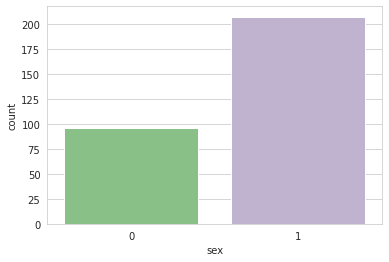

####################### CP #######################
    cp      Ratio
0  143  47.194719
2   87  28.712871
1   50  16.501650
3   23   7.590759
##################################################


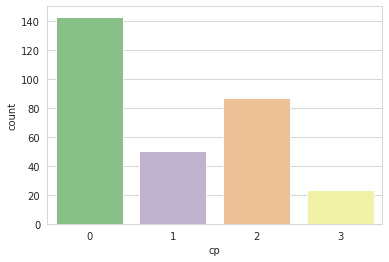

###################### FBS #######################
   fbs      Ratio
0  258  85.148515
1   45  14.851485
##################################################


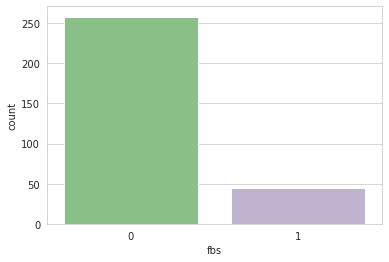

#################### RESTECG #####################
   restecg      Ratio
1      152  50.165017
0      147  48.514851
2        4   1.320132
##################################################


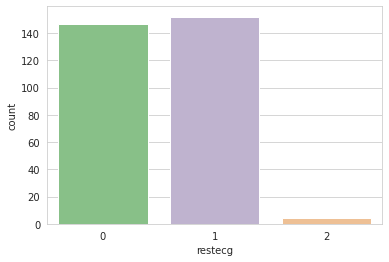

###################### EXNG ######################
   exng      Ratio
0   204  67.326733
1    99  32.673267
##################################################


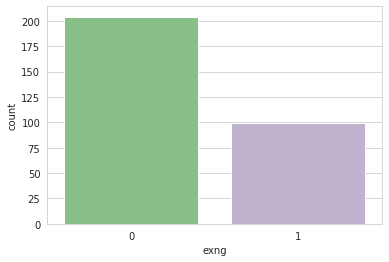

###################### SLP #######################
   slp      Ratio
2  142  46.864686
1  140  46.204620
0   21   6.930693
##################################################


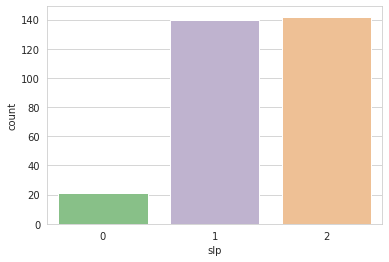

###################### CAA #######################
   caa      Ratio
0  175  57.755776
1   65  21.452145
2   38  12.541254
3   20   6.600660
4    5   1.650165
##################################################


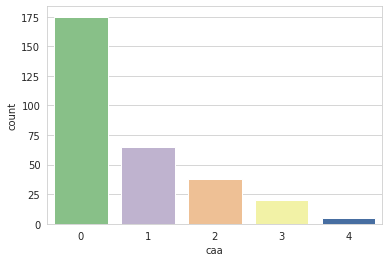

##################### THALL ######################
   thall      Ratio
2    166  54.785479
3    117  38.613861
1     18   5.940594
0      2   0.660066
##################################################


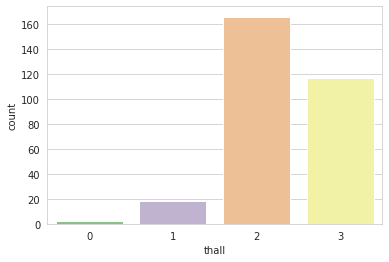

##################### OUTPUT #####################
   output      Ratio
1     165  54.455446
0     138  45.544554
##################################################


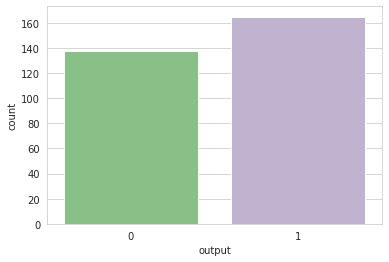

In [128]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != 'O']
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == 'O']
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#"*50)
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe,palette='Accent')
        plt.show()
        
for i in cat_cols:
    print((' '+i.upper()+' ').center(50,'#'))
    cat_summary(df,i,plot=True)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Analysis of Numerical Variables</span>

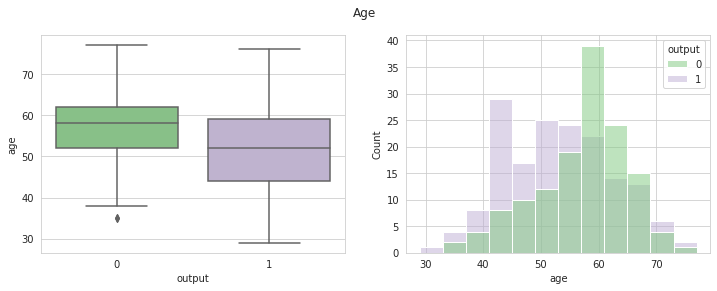

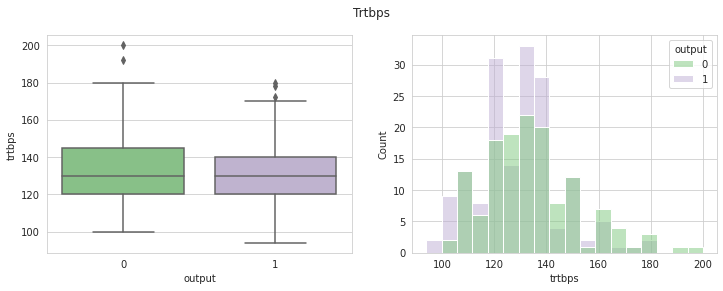

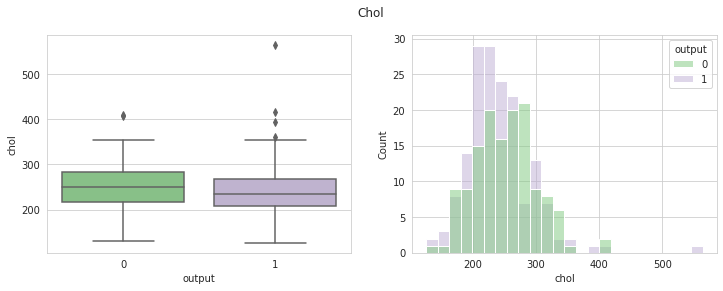

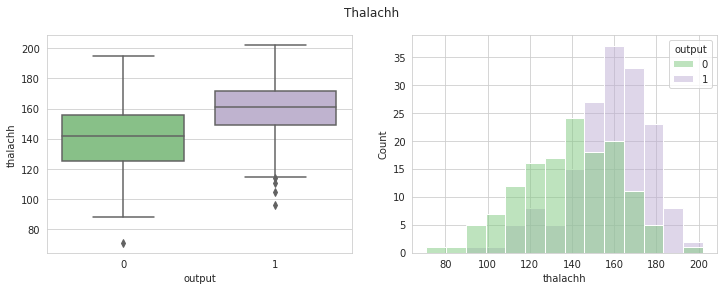

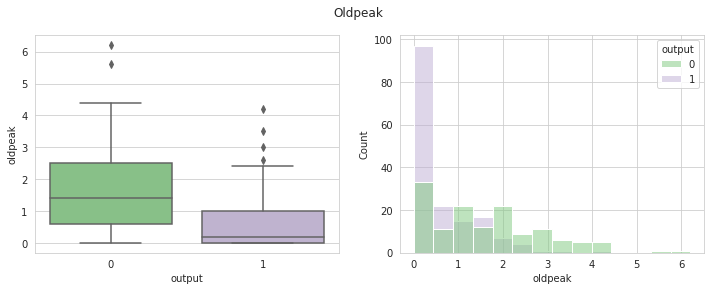

In [129]:
num_cols = [col for col in df.columns if col not in cat_cols and df[col].dtypes != 'O']
for i in num_cols:
    fig, axes = plt.subplots(1, 2,figsize=(12,4))
    fig.suptitle(i.title(),size=12)
    sns.boxplot(ax=axes[0],y=i,x='output',data=df,palette='Accent')
    sns.histplot(ax=axes[1],x=i,hue='output',data=df,palette='Accent')
    plt.show()

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Pairwise Relationships</span>

<Figure size 1440x1440 with 0 Axes>

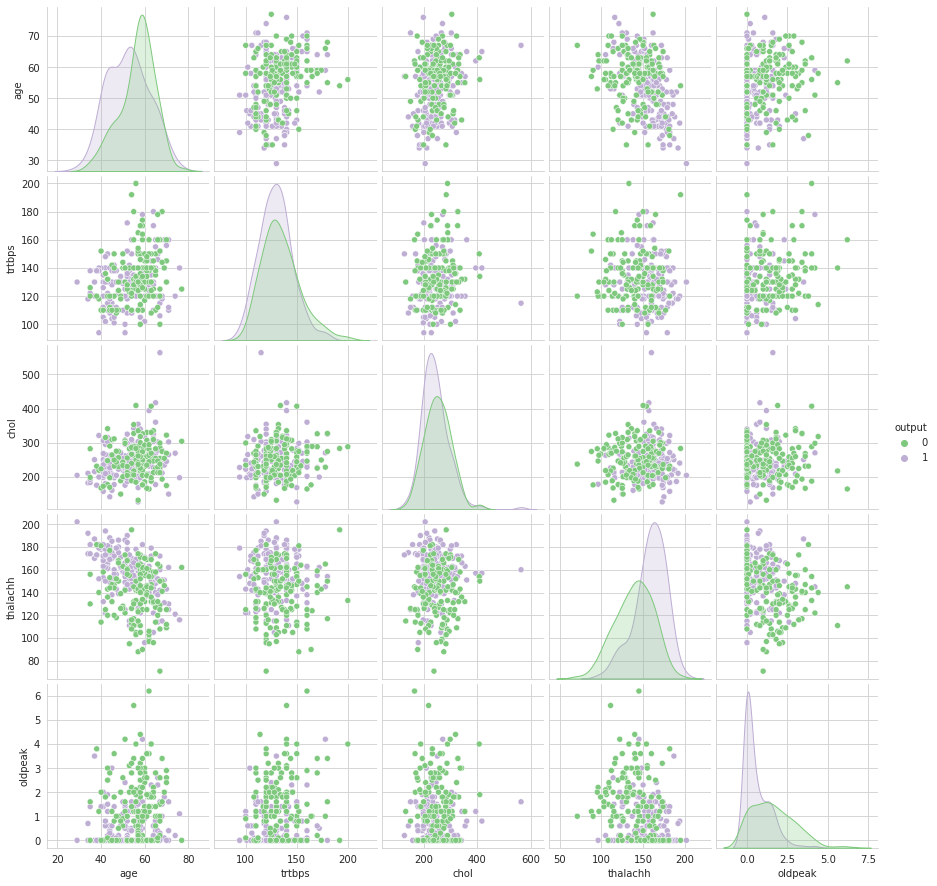

In [130]:
num_cols.append('output')
plt.figure(figsize=(20,20))
sns.pairplot(df[num_cols],hue='output',palette='Accent')
plt.show()
num_cols.remove('output')

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Pearson Correlation Map</span>

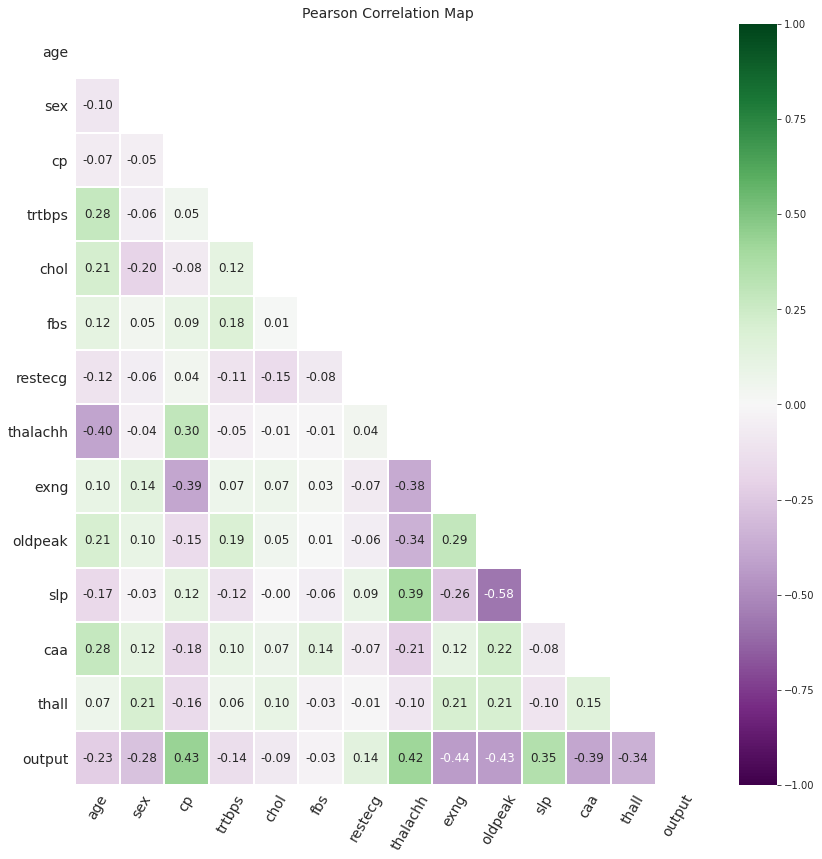

In [131]:
sns.set_style("white")
matrix = np.triu(df.corr(method="pearson"))
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(df.corr(),annot= True,fmt = ".2f",ax=ax,
            vmin = -1, vmax = 1, mask = matrix, cmap = "PRGn",
            linewidth = 0.4,linecolor = "white",annot_kws={"size": 12})
plt.xticks(rotation=60,size=14)
plt.yticks(rotation=0,size=14)
plt.title('Pearson Correlation Map', size = 14)
plt.show()

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Age & Thalachh</span>

In [132]:
color = ['#A75BD5','#66D461']
fig = go.Figure()
for i in df['output'].unique():
    fig.add_trace(go.Scatter(x=df[df['output']==i]['age'],
                            y=df[df['output']==i]['thalachh'],
                            mode='markers', name=str(i),showlegend = True,
                            marker = dict(color = color[i],size = 16,
                                          opacity = 0.65,line=dict(color='black', width=0.9))))
    
fig.update_layout(title=dict(text='age & thalachh',
                               y=0.9,x=0.5,xanchor= 'center',yanchor= 'top'),
                               xaxis = dict(title='age'),
                               yaxis =dict(title='thalachh'),template='plotly_white')

iplot(fig)

In [133]:
data = go.Scatter3d(x = df['age'],y = df['trtbps'],z = df['chol'],
                    mode='markers',text=df['output'], marker=dict(color=df['output'],size=7,
                                                colorscale='Sunsetdark',showscale=False,opacity=0.65))

layout = go.Layout(title=dict(text='Age - trtbps - chol',y=0.9,x=0.5,xanchor= 'center',yanchor= 'top'),
                   scene = dict(xaxis = dict(title='Age'),
                                yaxis = dict(title = 'trtbps'),
                                zaxis = dict(title='chol')),template='plotly_white')

fig = go.Figure(data=data,layout=layout)
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Heart Attack</span>

In [134]:
fig = go.Figure(data=[go.Pie(labels=['Yes','No'],
                             values=df['output'].value_counts()[0:5].values,
                             pull=[0, 0.1])])

fig.update_traces(hoverinfo='label', textinfo='percent', textfont_size=20,textposition ='auto',
                  marker=dict(colors=color, line=dict(color='black', width=2)))

fig.update_layout(title=dict(text='Heart Attack',
                               y=0.9,x=0.5,xanchor= 'center',yanchor= 'top'),
                               xaxis = dict(title='age'),
                               yaxis =dict(title='thalachh'),template='plotly_white')

iplot(fig)

In [135]:
data = [go.Histogram(x= df['age'],
                     xbins = dict(start = 0,end =100,size =5),
                    marker=dict(color='#A75BD5',line=dict(color='black', width=2)))]

layout = go.Layout(title=dict(text='Age Distribution',
                               y=0.9,x=0.5,xanchor= 'center',yanchor= 'top'),
                               xaxis = dict(title='Age Groups'),
                               yaxis =dict(title='Frequency'),template='plotly_white')

fig = go.Figure(data = data, layout = layout)

iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Shapiro-Wilks Test for Normality</span>

In [136]:
data = go.Bar(x = [var for var in df.columns],
              y = [round(shapiro(df[var])[0],2) for var in df.columns],
              text =[round(shapiro(df[var])[0],2) for var in df.columns],
              textposition= 'outside',marker = dict(color = '#66D461',line_color = 'black',line_width=3))

layout = go.Layout(title=dict(text='Shapiro-Wilks Test for Normality',
                               y=0.9,x=0.5,xanchor= 'center',yanchor= 'top'),
                               xaxis = dict(title='Variables'),
                               yaxis =dict(title='Test Stats'),template='plotly_white')

fig=go.Figure(data=data, layout=layout)
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Levene's Test Homogeneity of Variance</span>

In [137]:
stat, p = levene(df["age"],df["sex"],df["cp"],df["trtbps"],df["chol"],
                 df["fbs"],df["restecg"],df["thalachh"],df["exng"],
                 df["oldpeak"],df["slp"],df["thall"],df["output"])
print('Test Stat: {}'.format(stat))
print('p-value: {}'.format(p))

Test Stat: 331.21402677172966
p-value: 0.0


<a id = "5"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#A75BD5; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Data Preprocessing</span></h1>

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Duplicated Values</span>

In [138]:
def check_duplications(dataframe):
    if dataframe.duplicated().sum() > 0:
        if dataframe.duplicated().sum() == 1:
            print('There is {} duplicated value in data'.format(dataframe.duplicated().sum()))
        else:
            print('There are {} duplicated values in data'.format(dataframe.duplicated().sum()))
    else:
        print('There are no duplicated values in data')
        
check_duplications(df)

There is 1 duplicated value in data


In [139]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [140]:
df.drop_duplicates(keep='first',inplace=True)
check_duplications(df)

There are no duplicated values in data


<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Missing Values</span>

In [141]:
def check_missing(dataframe):
    if dataframe.isnull().sum().sum() > 0:
        print(dataframe.isnull().sum(), '\n')
        print('There are {} missing values'.format(dataframe.isnull().sum().sum()))
    else:
        print('There are no missing values')

check_missing(df)

There are no missing values


<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Outliers</span>

In [142]:
outlier_indices = []

for feature in num_cols:    
    q1 = np.percentile(df[feature],25)
    q3 = np.percentile(df[feature],75)
    iqr = q3-q1
    outlier_step = iqr*1.5
    upper = q3 + outlier_step
    lower = q1 - outlier_step
    outlier_list_col = df[(df[feature] < lower) | (df[feature] > upper)].index
    for a in outlier_list_col:
        outlier_indices.append(a)
    if len(outlier_list_col) > 0:
        df[feature].iloc[outlier_list_col.values.tolist(),] = np.NaN
        
cols = [col for col in df.columns if col not in df.columns[df.isnull().any()].tolist()]
DT_pipe = Pipeline(steps=[('scale',StandardScaler()),
                          ('lr',DecisionTreeRegressor(random_state=42))])

for feature in [missing for missing in df.columns if df[missing].isnull().any()]:
    print('{} Outlier(s) detected in {}'.format(df[feature].isnull().sum(),feature))
    X = df[['age','sex','slp',feature]].copy()
    Missing = X[X[feature].isna()]
    X = X[~X[feature].isna()]
    Y = X.pop(feature)
    DT_pipe.fit(X,Y)
    predicted = pd.Series(DT_pipe.predict(Missing[['age','sex','slp']]),index=Missing.index)
    df.loc[Missing.index,str(feature)] = predicted

9 Outlier(s) detected in trtbps
5 Outlier(s) detected in chol
1 Outlier(s) detected in thalachh
5 Outlier(s) detected in oldpeak


<a id = "6"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#A75BD5; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Model Preparations</span></h1>

In [143]:
test_size = 0.3
random_state = 42

for i in cat_cols:
    df[i] = pd.Categorical(df[i])

x = df.drop("output",axis=1) #independent variables
y = df["output"] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state= random_state)

scaler = StandardScaler() #StandardScaler - RobustScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id = "7"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#A75BD5; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:22px; color:#FBFAFC; ">Models</span></h1>

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Gaussian Naive Bayes</span>

############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 91 points : 13 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        42
           1       0.89      0.84      0.86        49

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

############################################################


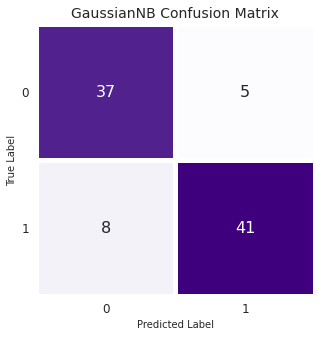

In [144]:
def initiate_model(model):    
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print('#'*60)
    print((' '+model.__class__.__name__+' ').center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(X_test.shape[0], (y_test != y_pred).sum()))
    print(classification_report(y_test, y_pred, target_names=['0','1']))
    print('#'*60)
    cm = confusion_matrix(y_test, y_pred)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)
    plt.show()
initiate_model(GaussianNB())

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Bernoulli Naive Bayes</span>

############################################################
                        BernoulliNB                         
############################################################
Number of mislabeled points out of a total 91 points : 15 

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.83      0.88      0.85        49

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

############################################################


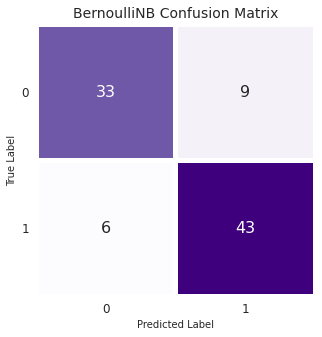

In [145]:
bnb = BernoulliNB()
initiate_model(bnb)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Stochastic Gradient Descent</span>

############################################################
                       SGDClassifier                        
############################################################
Number of mislabeled points out of a total 91 points : 16 

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        42
           1       0.88      0.78      0.83        49

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91

############################################################


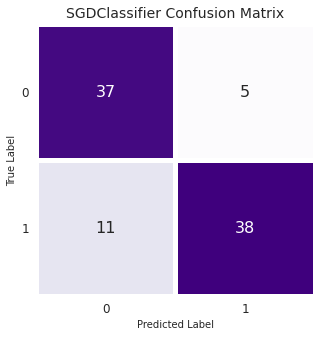

In [146]:
sgd = SGDClassifier(loss='hinge',random_state=random_state)
initiate_model(sgd)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Linear Discriminant Analysis</span>

In [147]:
classifier = [DecisionTreeClassifier(random_state = random_state),
              SVC(random_state = random_state, probability = True),
              RandomForestClassifier(random_state = random_state),
              LogisticRegression(random_state = random_state),
              KNeighborsClassifier(),
              GradientBoostingClassifier(random_state = random_state),
              LGBMClassifier(random_state = random_state)]

lda = LinearDiscriminantAnalysis(solver='svd',n_components = 1)
data = go.Bar(x = [round(accuracy_score(y_test, i.fit(lda.fit_transform(X_train,y_train), y_train).predict(lda.transform(X_test))),2) for i in classifier],
              y = [i.__class__.__name__ for i in classifier],
              name = str([i.__class__.__name__ for i in classifier]),
              text = [round(accuracy_score(y_test, i.fit(lda.fit_transform(X_train,y_train), y_train).predict(lda.transform(X_test))),4) for i in classifier],
              textposition = 'outside',orientation='h',
              marker = dict(color = '#A75BD5',line_color = 'black',line_width=3))

layout = go.Layout(title=dict(text='Linear Discriminant Analysis',y=0.9,x=0.5,
                              xanchor= 'center',yanchor= 'top'),xaxis = dict(title='Accuracy Score'),
                   template='plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,1])
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Principal Component Analysis</span>

In [148]:
fig = make_subplots(rows=1, cols=2,shared_yaxes=True,subplot_titles=('2 Components','3 Components'))
pca = PCA(n_components = 2)
fig.add_trace(go.Bar(x = [round(accuracy_score(y_test, i.fit(pca.fit_transform(X_train,y_train), y_train).predict(pca.transform(X_test))),2) for i in classifier],
              y = [i.__class__.__name__ for i in classifier],
              name = str([i.__class__.__name__ for i in classifier]),
              text = [round(accuracy_score(y_test, i.fit(pca.fit_transform(X_train,y_train), y_train).predict(pca.transform(X_test))),4) for i in classifier],
              textposition = 'outside',orientation='h',showlegend=False,
              marker = dict(color = '#66D461',line_color = 'black',line_width=3)),row=1,col=1)

pca = PCA(n_components = 3)
fig.add_trace(go.Bar(x = [round(accuracy_score(y_test, i.fit(pca.fit_transform(X_train,y_train), y_train).predict(pca.transform(X_test))),2) for i in classifier],
              y = [i.__class__.__name__ for i in classifier],
              name = str([i.__class__.__name__ for i in classifier]),
              text = [round(accuracy_score(y_test, i.fit(pca.fit_transform(X_train,y_train), y_train).predict(pca.transform(X_test))),4) for i in classifier],
              textposition = 'outside',orientation='h',showlegend=False,
              marker = dict(color = '#66D461',line_color = 'black',line_width=3)),row=1,col=2)

fig.update_layout(title=dict(text='Principal Component Analysis',y=0.9,x=0.5,xanchor= 'center',
                             yanchor= 'top'),template = 'plotly_white')

fig.update_xaxes(range=[0,1],row=1,col=1)
fig.update_xaxes(range=[0,1],row=1,col=2)
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Hyperparameter Tuning - Grid Search</span>

######################################################################
                        DecisionTreeClassifier                        
######################################################################
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Accuracy: 67.03%
MSE: 0.33
ROC AUC: 0.775
Recall: 0.49
Precision: 0.721
F1-Score: 0.66
Best Estimator: DecisionTreeClassifier(max_depth=3, min_samples_split=110, random_state=42)
######################################################################
                                 SVC                                  
######################################################################
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Accuracy: 82.42%
MSE: 0.176
ROC AUC: 0.89
Recall: 0.837
Precision: 0.824
F1-Score: 0.824
Best Estimator: SVC(C=100, gamma=0.001, probability=True, random_state=42)
######################################################################
                        RandomFo

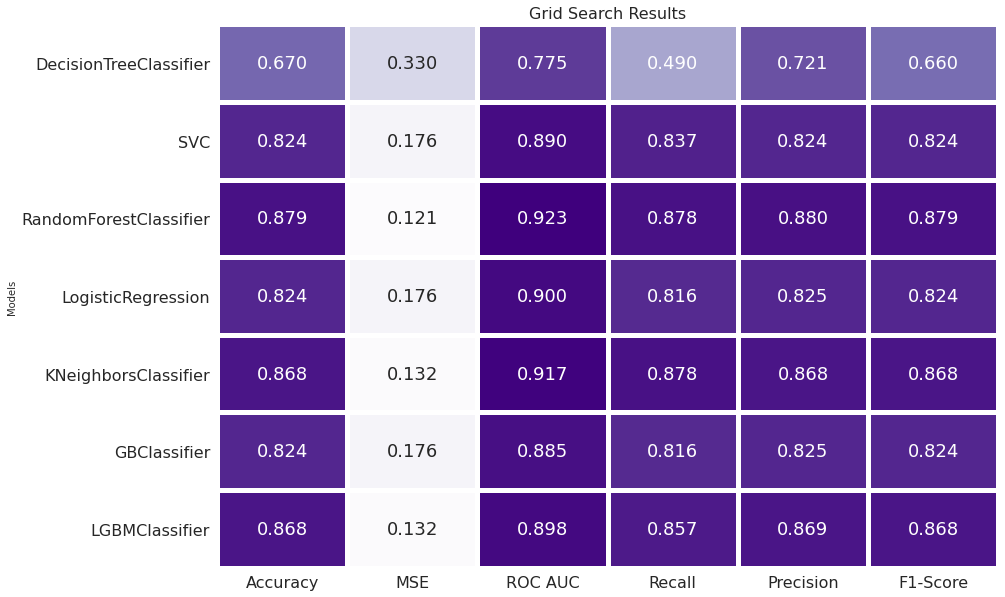

In [149]:
models = ['DecisionTreeClassifier',
          'SVC',
          'RandomForestClassifier',
          'LogisticRegression',
          'KNeighborsClassifier',
          'GBClassifier',
          'LGBMClassifier']

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']} 

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,3,5,12,30]}
    
gbc_param_grid = {"learning_rate": [0.05, 0.1, 0.2],
                  "min_samples_split": [2,3,10],
                  "min_samples_leaf": [1,3,10]}

lgbmc_param_grid = {'num_leaves': [31, 127],
                    'reg_alpha': [0.1, 0.5],
                    'min_data_in_leaf': [30, 50, 100, 300],
                    'lambda_l1': [0, 1, 1.5],
                    'lambda_l2': [0, 1]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   gbc_param_grid,
                   lgbmc_param_grid]

accuracy = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
for i in range(len(classifier)):
    print('#'*70)
    print((' '+models[i]+' ').center(70,' ')+'\n'+'#'*70)
    clf = GridSearchCV(classifier[i],param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,y_train)
    accuracy.append(accuracy_score(clf.predict(X_test),y_test))
    mean_squared_errors.append(mean_squared_error(y_test,clf.predict(X_test)))
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
    recall_scores.append(recall_score(y_test, clf.predict(X_test)))
    precision_scores.append(precision_score(y_test, clf.predict(X_test), average='weighted'))
    f1_scores.append(f1_score(y_test, clf.predict(X_test), average='weighted'))
    best_estimators.append(clf.best_estimator_)
    
    print("Accuracy: {}%".format(round(accuracy[i]*100,2)))
    print("MSE: {}".format(round(mean_squared_errors[i],3)))
    print("ROC AUC: {}".format(round(roc_auc_scores[i],3)))
    print("Recall: {}".format(round(recall_scores[i],3)))
    print("Precision: {}".format(round(precision_scores[i],3)))
    print("F1-Score: {}".format(round(f1_scores[i],3)))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("#"*70)
cv_results = pd.DataFrame({"Accuracy":accuracy,
                           "MSE":mean_squared_errors,
                           "ROC AUC":roc_auc_scores,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models": models})

cv_results.index = cv_results["Models"]
cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(cv_results, annot=True,cmap = "Purples",
            fmt= '.3f',ax=ax,linewidths = 5,
            cbar = False,annot_kws={"size": 18})

plt.xticks(size = 16)
plt.yticks(size = 16, rotation = 0)
plt.title("Grid Search Results", size = 16)
plt.show()

In [150]:
color = ['#EA3434','#EA9A34','#EAE234','#97EA34','#34EA47','#34EACC','#34ABEA']
data = go.Bar(x = [round(i,5) for i in cv_results['Accuracy']],y = models,
             text = [round(i,3) for i in cv_results['Accuracy']],orientation='h',
             textposition = 'outside',marker = dict(color = color,line_color = 'black',line_width=2))

layout = go.Layout(title=dict(text='Grid Search Results',y=0.9,x=0.5,
                              xanchor= 'center',yanchor= 'top'),xaxis = dict(title='Accuracy Score'),
                   template='plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,1])
iplot(fig)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Tuned LGBMClassifier</span>

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
############################################################
                       LGBMClassifier                       
############################################################
Number of mislabeled points out of a total 91 points : 12 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.89      0.86      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

############################################################


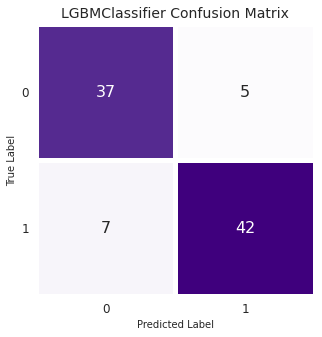

In [151]:
lgbm = best_estimators[6]
initiate_model(lgbm)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Tuned KNN</span>

############################################################
                    KNeighborsClassifier                    
############################################################
Number of mislabeled points out of a total 91 points : 12 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.88      0.88      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

############################################################


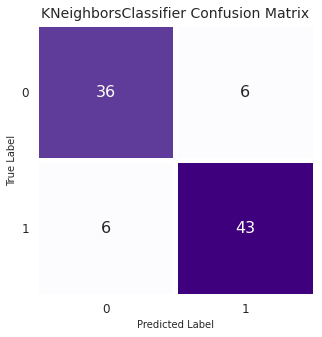

In [152]:
knn = best_estimators[4]
initiate_model(knn)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Tuned Random Forest</span>

############################################################
                   RandomForestClassifier                   
############################################################
Number of mislabeled points out of a total 91 points : 11 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.90      0.88      0.89        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

############################################################


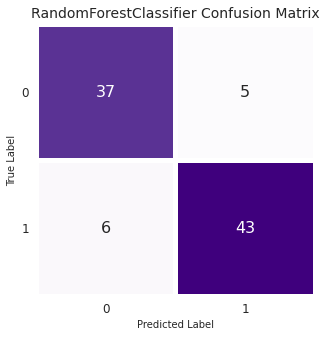

In [153]:
rf = best_estimators[2]
initiate_model(rf)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Voting Classifier</span>

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
############################################################
                      VotingClassifier                      
############################################################
Number of mislabeled points out of a total 91 points : 11 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.90      0.88      0.89        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

############################################################


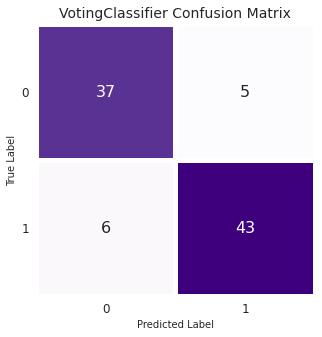

In [154]:
best_indices = cv_results.reset_index().sort_values('Accuracy',ascending=False)[0:3].index.tolist()

votingC = VotingClassifier(estimators = [("rf",best_estimators[best_indices[0]]),
                                        ("knn",best_estimators[best_indices[1]]),
                                        ("lgbm",best_estimators[best_indices[2]])])

initiate_model(votingC)

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">If you liked this notebook, please upvote 😊</span>

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">If you have any suggestions or questions, feel free to comment!</span>

<span style="font-weight: bold; font-family:Verdana; font-size:18px; color:#A75BD5; ">Best Wishes!</span>